The homework is interleaved with a tutorial on using Scikit-Learn.  Wherever `## Your answer here ##` occurs, replace it with your answer; those cells should not be modified otherwise.  Most of the functions can be written as one-liners, but some will need multiple lines of code.  Include 'return' as needed.

Submit the notebook as `hw2.ipynb`.
# Scikit-learn
Scikit-learn (sklearn) is a machine learning library.  We will start off using the Iris dataset.  To access it:

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

The value of `iris` is a "Bunch," which behaves like a dict, except that one can also use the dot syntax to access values.  For example:

In [6]:
iris['data'] is iris.data

True

You can call `iris.keys()` to get a list of relevant data members.  Have a look at `iris.DESCR` to get a description of the dataset.

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The value of `iris.data` is the **design matrix**.  It is conventional to refer to the design matrix as *X*.

In [9]:
X = iris.data

Look at *X*'s shape to confirm that there are 150 instances and 4 features.

In [10]:
X.shape

(150, 4)

The first row is the feature vector for the first instance:

In [11]:
X[0, :]

array([5.1, 3.5, 1.4, 0.2])

Make sure you understand what the numbers mean.  `iris.feature_names` gives the feature names.

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Q1
Define *long-petaled samples* to be instances whose petal length is at least *theta* cm.  How many long-petaled samples are there?  (Hint: True and False are treated numerically as 1 and 0.)

In [13]:
def n_long_petaled (theta):
    return (X[:, 2] >= theta).sum()

# Q2
Among long-petaled samples, what is the mean sepal length?

In [269]:
def mean_sepal_length (petal_theta):
    M = (X[:, 2] >= petal_theta)
    A = (X[:, 2])[M]
    return A.mean()

For example, the mean sepal length where petal length is at least 5 cm:

In [270]:
mean_sepal_length(5)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True False False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
[5.  5.1 6.  5.1 5.9 5.6 5.8 6.6 6.3 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5
 6.7 6.9 5.  

5.628260869565217

The conventional name for the **label vector** is *y*.  It is called `iris.target` in the iris dataset.  Its *i*-th element is the label for the *i*-th instance.  The values are label indices (counting from 0).

In [164]:
y = iris.target

In [165]:
# for example
y[0]

0

To give meaning to a class index, use it to access `iris.target_names`.  (These are species of iris.)

In [166]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Q3
For the given label vector, how many instances are there that belong to class *j*? ( *j* is one of 0, 1, 2.)

In [167]:
def class_count (y, j):
    return (y == j).sum()

In [168]:
# applying it
(class_count(y, 0), class_count(y, 1), class_count(y, 2))

(50, 50, 50)

# Q4
A trivial classifier always predicts the same class.  What is the error (on the complete dataset) for a classifier that always predicts *j*?  The value should be a real number in the range [0, 1].

In [169]:
def trivial_error (j):
    return 1 - class_count(y, j)/150

In [170]:
# for example
trivial_error(0)

0.6666666666666667

In general, one should choose the value for *j* that minimizes error, though in this case that choice would be arbitrary.
# Nearest neighbors
To fetch the sklearn nearest-neighbors learner:

In [171]:
from sklearn.neighbors import KNeighborsClassifier

Learners in sklearn all follow the same pattern.  First, one instantiates the learner class, providing hyperparameters.  In this case, we provide the number of neighbors to consider:

In [172]:
clf = KNeighborsClassifier(1)

Next, one **fits** the classifier to the training data.  This is the learning step.  It does not output a new object, but rather stores the results of training internally to the classifier.  (To be precise, it does return a value, but the value is just the classifier itself.)

In [173]:
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

The trained classifier can then be applied to data to make predictions.  Let us try it on the training data.  Note that we do not provide the $y$ values - it produces an estimate $\hat{y}$ as output.

In [174]:
yhat = clf.predict(X)

For example, the predictions on the first 5 instances:

In [175]:
yhat[:5]

array([0, 0, 0, 0, 0])

# Q5
`clf.predict` is a prediction function - it is an example of a function *f* takes an array of instances *X* and returns a vector of predictions.  Compute the error rate compared to a reference vector *y* containing the correct labels.  (Sklearn classifiers have a built-in method for computing error, but you should do your own computation here.)

In [176]:
def prediction_error (f, X, y):
    return (f(X) != y).sum()/150

For example, compute the prediction error of the 1-NN classifier on the iris dataset.  Is this result surprising?

In [177]:
prediction_error(clf.predict, X, y)

0.0

Here is the Sklearn error-rate method.  It actually returns the accuracy, which is 1 $-$ error.  For more information, do `help(clf.score)`.

In [178]:
clf.score(X, y)

1.0

We should split the data into training and test sets.

Simply taking the first 100 instances or so as training data would not be a good idea.  (Why not?  Have a look at the label vector.)  Instead, we should shuffle the data first.  Sklearn provides functionality that supports this, but we'll do it manually this time.  First, let's get a random-number generator.  Specifying the seed (43, which is purely arbitrary) makes the results reproducible.

In [179]:
import numpy as np
rng = np.random.default_rng(43)

A shuffle of the data is represented by a permutation of the indices 0, 1, ..., n.  Remember that you can use a vector of indices to reorder rows of a matrix (see the Numpy Arrays document, if you have forgotten).

In [180]:
rng.permutation(10)
print(rng.permutation(10))

[1 5 6 2 0 3 8 7 4 9]


# Q6
Create a shuffled index array and use it to reorder the design matrix and the label vector in the same way.  Let a proportion *p* (say 0.8) be given.  If there are *m* instances, the training instances are the first *pm* instances (rounded to the nearest integer) and the test instances are the remainder.  (The function `round()` is a built-in function in Python.)  The return value should be a tuple (*X1*, *X2*, *y1*, *y2*, *i*), where *i* is the vector of shuffled indices, *X1* and *y1* are the training instances and their labels, and *X2* and *y2* are the test instances and their labels.  (If you set the variables *X1*, *X2*, *y1*, *y2*, and *i*, you can do `return (X1, X2, y1, y2, i)`.)

In [354]:
def split_data (X, y, p, seed):
    int = round(150 * p)
    otherint = round(150 - int)
    X1 = X[:int, :3]
    X2 = X[otherint:, :3]
    y1 = y[:int]
    y2 = y[otherint:]
    i = rng.permutation(seed)
    i = np.arange((seed))
    return((X1, X2, y1, y2, i))

In [355]:
# for example
(X_trn, X_tst, y_trn, y_tst, shuf) = split_data(X, y, 0.8, 43)

A sanity check.

In [356]:
print(X_trn[0], y_trn[0])
print(X[shuf][0], y[shuf][0])

[5.1 3.5 1.4] 0
[5.1 3.5 1.4 0.2] 0


# Q7
Write a function that creates and trains a 1-nearest-neighbor classifer.  The return value is the classifier.

In [244]:
def train_nn (X, y):
    return KNeighborsClassifier(1).fit(X,y)

This time, we'll use the built-in `score` method.

In [245]:
clf = train_nn(X_trn, y_trn)

Let's look at the training error and testing accuracy now.

In [246]:
(clf.score(X_trn, y_trn), clf.score(X_tst, y_tst))

(1.0, 1.0)

# Plotting

Importing the plotting package:

In [247]:
import matplotlib.pyplot as plt

To produce a scatter plot, `plt.scatter()` takes two vectors, containing aligned *x* and *y* values.

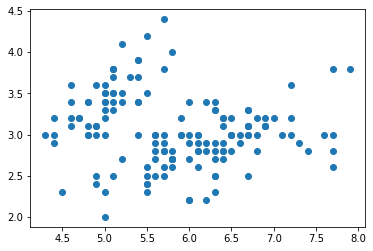

In [248]:
plt.scatter(X[:, 0], X[:, 1])

To see which data point belongs to which class, let us add colors.  We will use the class $(0, 1, 2)$ as an index into a color map.

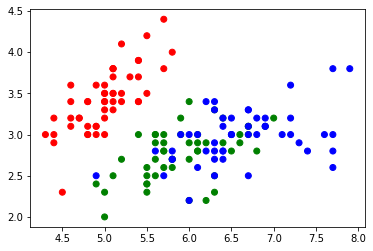

In [249]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'green', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

Let's create a dataset consisting of just these two features.

In [250]:
X2 = X[:, :2]
y2 = y

Train a classifier.

In [251]:
clf2_nn = train_nn(X2, y2)
clf2_nn.score(X2, y2)

0.92

(Ungraded question:) Why isn't the training accuracy 1.0?  How could the 1-nearest neighbor to a training example *x* not be *x* itself?

Next, let's look at the decision boundaries.  We want to get predictions over the whole space.  We create a grid of points that covers the space.  Let's choose a rectangle that is a little bigger than the plotted area above, say, 4 to 8 on the x-axis and 2 to 4.5 on the y-axis.  The grid will consist of 100 x 1000 equally spaced points.

In [252]:
axis1 = np.linspace(4, 8, 100)
axis2 = np.linspace(2, 4.5, 100)
(G1, G2) = np.meshgrid(axis1, axis2)

Looking at the shapes, you can see that *G1* and *G2* are both 100 x 100 matrices.  `G1[i,j]` is the x-value of the (i,j)-th point and `G2[i,j]` is its y-value.

In [253]:
G1.shape

(100, 100)

In [254]:
G2.shape

(100, 100)

In [255]:
(G1[0,0], G2[0,0])

(4.0, 2.0)

In [256]:
(G1[-1,-1], G2[-1,-1])

(8.0, 4.5)

# Q8
To call the prediction function, we need a two-column matrix.  We need to flatten G1 and G2 and make them be columns of a single matrix.

In [257]:
def G_to_X (G1, G2):
    a = G1.ravel()
    b = G2.ravel()
    return np.column_stack((a,b))

The shape should be 10,000 x 2.  The first pair should be (4.0, 2.0) and the last pair should be (8.0, 4.5).

In [258]:
X_grid = G_to_X(G1, G2)
print(X_grid.shape)
print(X_grid[0, :])
print(X_grid[-1, :])

(10000, 2)
[4. 2.]
[8.  4.5]


Get predictions for each grid point.

In [259]:
y_grid = clf2_nn.predict(X_grid)

Confirm that the shape of `y_grid` is (10000,)

In [260]:
y_grid.shape

(10000,)

# Q9
For the sake of plotting, you need to change it back to a 100 x 100 matrix.

In [261]:
def y_to_G (y):
    return y.reshape((100,100))

In [262]:
Gy_nn = y_to_G(y_grid)

We'll use a light-colored color-map to fill in the whole-space predictions as background colors.

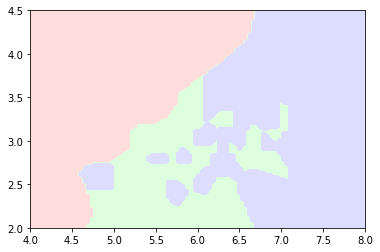

In [263]:
light = ListedColormap(['#ffdddd', '#ddffdd', '#ddddff'])
plt.contourf(G1, G2, Gy_nn, cmap=light)

# Q10
Write a function that takes X, y, G1, G2, and Gy, and plots the whole-space predictions in the background and the datapoints in the foreground (colored by class).

In [264]:
def plot_decision (X, y, G1, G2, Gy):
    plt.scatter(X[:, 0], X[:, 1])
    colors = ListedColormap(['red', 'green', 'blue'])
    light = ListedColormap(['#ffdddd', '#ddffdd', '#ddddff'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
    plt.contour(G1, G2, Gy, cmap = light)

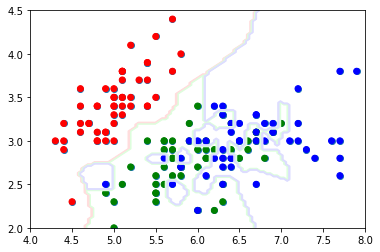

In [265]:
plot_decision(X2, y2, G1, G2, Gy_nn)

Now let's train a Naive Bayes classifier on the same dataset.

In [266]:
from sklearn.naive_bayes import MultinomialNB
clf2_nb = MultinomialNB(alpha=1e-10).fit(X2, y2)

Get the predictions over the space.

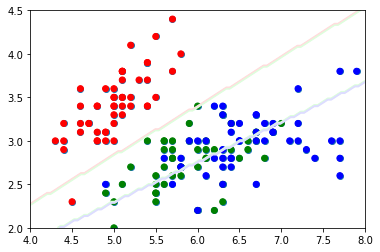

In [267]:
Gy_nb = y_to_G(clf2_nb.predict(X_grid))
plot_decision(X2, y2, G1, G2, Gy_nb)